<img src = "Cognitive-Class-Logo.png" width = 400, align = "center">

# <center>K-Plus Proches Voisins</center>

Dans cet exercice de laboratoire, vous apprendrez un algorithme d'apprentissage automatique populaire, l'arbre de décision. Vous utiliserez cet algorithme de classification pour créer un modèle à partir des données historiques des patients et de leur réponse aux différents médicaments. Ensuite, vous utilisez l'arbre de décision entraîné pour prédire la classe d'un patient inconnu ou pour trouver un médicament approprié pour un nouveau patient.

Importez les bibliothèques suivantes :
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### À propos de l'ensemble de données
Imaginez que vous êtes un chercheur médical qui compile des données pour une étude. Vous avez collecté des données sur un ensemble de patients, qui souffraient tous de la même maladie. Au cours de leur traitement, chaque patient a répondu à l'un des 5 médicaments, Médicament A, Médicament B, Médicament c, Médicament x et y.

Une partie de votre travail consiste à créer un modèle pour découvrir quel médicament pourrait être approprié pour un futur patient atteint de la même maladie. Les ensembles de caractéristiques de cet ensemble de données sont l'âge, le sexe, la tension artérielle et le cholestérol des patients, et la cible est le médicament auquel chaque patient a répondu.

C'est un exemple de classificateur binaire, et vous pouvez utiliser la partie formation de l'ensemble de données
pour construire un arbre de décision, puis l'utiliser pour prédire la classe d'un patient inconnu, ou pour le prescrire à un nouveau patient.

### Téléchargement de données
Pour télécharger les données, nous utiliserons l'adresse suivante en cliquant sur le lien, ensuite nous copions le fichier excel téléchargé dans le localhost.

In [ ]:
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

maintenant, lisez les données à l'aide du cadre de données pandas :

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Practice 
What is the size of data? 

In [ ]:
# write your code here




## Pré-traitement

Supprimez la colonne contenant le nom de la cible car elle ne contient pas de valeurs numériques.

In [3]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Comme vous pouvez le constater, certaines caractéristiques de cet ensemble de données sont catégoriques, telles que __Sex__ ou __BP__. Malheureusement, les arbres de décision Sklearn ne gèrent pas les variables catégorielles. Mais nous pouvons toujours convertir ces caractéristiques en valeurs numériques. __pandas.get_dummies()__
converti la variable catégorielle en variables fictives/indicatrices.

In [4]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Nous pouvons maintenant remplir la variable cible.

In [5]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---
## Configuration de l'arbre de décision
Nous utiliserons <b>train/test split</b> sur notre <b>arbre de décision</b>. Importons <b>train_test_split</b> depuis <b>sklearn.cross_validation</b>.

In [6]:
from sklearn.model_selection import train_test_split

Maintenant, <b> train_test_split </b> renverra 4 paramètres différents. Nous les nommerons :<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
Le <b> train_test_split </b> aura besoin des paramètres : <br>
X, y, test_size=0.3 et random_state=3. <br> <br>
Le <b>X</b> et <b>y</b> sont les tableaux requis avant la division, le <b>test_size</b> représente le rapport de l'ensemble de données de test et le <b>random_state</b> garantit que nous obtenons les mêmes fractionnements.

In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Entraine toi
Imprimez les dimensions de X_trainset et y_trainset. Assurez-vous que ces dimensions correspondent

In [ ]:
# your code



## La modélisation
Nous allons d'abord créer une instance de <b>DecisionTreeClassifier</b> appelée <b>drugTree</b>.<br>
À l'intérieur du classificateur, spécifiez <i> critère="entropie" </i> afin que nous puissions voir le gain d'information de chaque nœud.

In [8]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Ensuite, nous allons ajuster les données avec la matrice de caractéristiques d'entraînement <b> X_trainset </b> et le vecteur de réponse d'entraînement <b> y_trainset </b>

In [9]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prédiction
Faisons quelques <b>prédictions</b> sur l'ensemble de données de test et stockons-le dans une variable appelée <b>predTree</b>.

In [11]:
predTree = drugTree.predict(X_testset)

Vous pouvez imprimer <b>predTree</b> et <b>y_testset</b> si vous souhaitez comparer visuellement la prédiction aux valeurs réelles.

In [12]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Évaluation
Ensuite, importons __metrics__ depuis sklearn et vérifions l'exactitude de notre modèle.

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


Le __score de précision__ de la classification calcule la précision du sous-ensemble : l'ensemble d'étiquettes prédit pour un échantillon doit correspondre exactement à l'ensemble d'étiquettes correspondant dans y_true.

Dans la classification multilabel, la fonction renvoie la précision du sous-ensemble. Si l'ensemble complet d'étiquettes prédites pour un échantillon correspond strictement au véritable ensemble d'étiquettes, la précision du sous-ensemble est de 1,0 ; sinon c'est 0.0.

## Entraine toi
Pouvez-vous calculer le score de précision sans sklearn ?

In [ ]:
# your code here



## Visualisation

In [38]:
from sklearn.tree import export_graphviz
featureNames = my_data.columns[0:5]
export_graphviz(drugTree,feature_names=featureNames, out_file="tree.dot", class_names= np.unique(y_trainset),
impurity=False, filled=True)

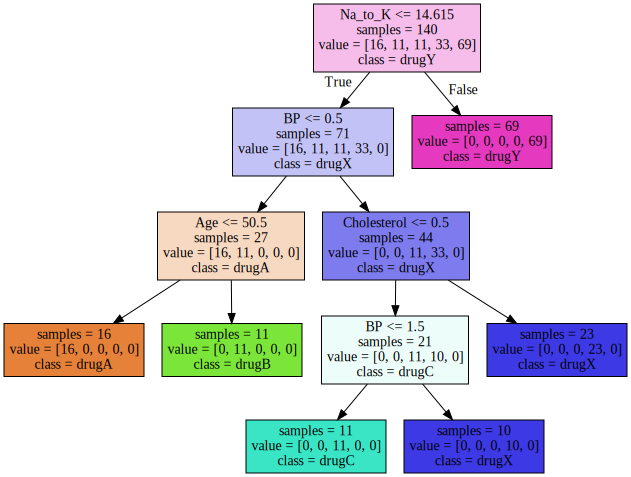

In [39]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Merci d'avoir terminé cette leçon !

Carnet créé par : <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​